Step 1: Load the Dataset

Start by loading the dataset and displaying the first few rows to understand its structure.

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Travel_Data.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
  Terrain Type  Distance (km) Travel Mode Terrain Difficulty  \
0        Urban             10         Car               Easy   
1     Mountain             50      Hiking          Difficult   
2      Coastal            200        Boat           Moderate   
3       Desert            100         Car          Difficult   
4       Forest             30        Bike           Moderate   

  Weather Conditions Accessibility    Elevation  Travel Time (hrs)  Cost ($)  
0              Sunny          High         Flat                0.5         5  
1              Snowy           Low  Mountainous               10.0         0  
2              Rainy        Medium         Flat                5.0        50  
3              Sunny           Low         Flat                2.0        20  
4              Rainy        Medium        Hilly                3.0        10  


Step 2: Display Summary Statistics and Check for Missing Values

Next, display summary statistics and check for any missing values.

In [6]:
# Display summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Summary statistics:
       Distance (km)  Travel Time (hrs)   Cost ($)
count      38.000000          38.000000  38.000000
mean       92.631579           5.310526  23.131579
std        77.867323           3.799274  24.222138
min        10.000000           0.500000   0.000000
25%        36.250000           2.575000   4.250000
50%        62.500000           4.350000  16.000000
75%       117.500000           7.150000  29.500000
max       300.000000          14.000000  80.000000

Missing values:
Terrain Type          0
Distance (km)         0
Travel Mode           0
Terrain Difficulty    0
Weather Conditions    0
Accessibility         0
Elevation             0
Travel Time (hrs)     0
Cost ($)              0
dtype: int64


Step 3: Handle Missing Values

For simplicity, we can drop rows with missing values. Alternatively, you can fill them with appropriate values.

In [7]:
# Drop rows with missing values
df.dropna(inplace=True)

Step 4: Visualize the Distribution of the Target Variable

Use seaborn to visualize the distribution of the target variable (Travel Mode).


Distribution of the target variable:
Travel Mode
Car       10
Hiking     8
Boat       8
Bike       7
Bus        3
Train      2
Name: count, dtype: int64


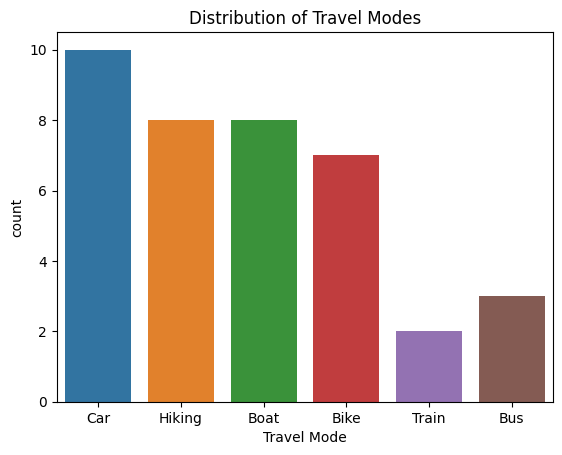

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display the distribution of the target variable
print("\nDistribution of the target variable:")
print(df['Travel Mode'].value_counts())

# Visualize the distribution of the target variable
sns.countplot(x='Travel Mode', data=df)
plt.title('Distribution of Travel Modes')
plt.show()

Step 5: Convert Categorical Variables to Numerical Format

Use OneHotEncoder to convert categorical variables to numerical format.

In [9]:
from sklearn.preprocessing import OneHotEncoder

# Convert categorical variables to numerical format using OneHotEncoder
categorical_features = ['Terrain Type', 'Terrain Difficulty', 'Weather Conditions', 'Accessibility', 'Elevation']

# Apply one-hot encoding to the features
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[categorical_features])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Combine the encoded features with the rest of the dataset
df = df.drop(categorical_features, axis=1)
df = pd.concat([df, encoded_df], axis=1)

C:\Users\anasn\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Step 6: Encode the Target Variable

Use LabelEncoder to convert the target variable to numerical format.

In [10]:
from sklearn.preprocessing import LabelEncoder

# Convert the target variable to numerical format using LabelEncoder
label_encoder = LabelEncoder()
df['Travel Mode'] = label_encoder.fit_transform(df['Travel Mode'])

Step 7: Standardize Numerical Features

Standardize numerical features to ensure they have a mean of 0 and a standard deviation of 1.

In [11]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features (if any)
numerical_features = ['Distance (km)', 'Travel Time (hrs)', 'Cost ($)']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

Step 8: Define Features and Target

Separate the features and the target variable.

In [12]:
# Define features and target
X = df.drop('Travel Mode', axis=1)
y = df['Travel Mode']

Step 9: Split the Data into Training and Test Sets

Split the data into training and test sets.

In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 10: Train the Model

Initialize and train a RandomForestClassifier model.

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Step 11: Evaluate the Model

Evaluate the model using the test set.

In [17]:
from sklearn.metrics import classification_report, accuracy_score

# Predict the travel modes for the test set
y_pred = model.predict(X_test)

# Decode the predicted and actual travel modes to their original labels
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

# Print the classification report and accuracy score
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))
print("\nAccuracy Score:")
print(accuracy_score(y_test_labels, y_pred_labels))

# Create a DataFrame to display actual vs predicted travel modes
results_df = pd.DataFrame({
    'Actual Travel Mode': y_test_labels,
    'Predicted Travel Mode': y_pred_labels
})

# Display the first few rows of the results
print("\nActual vs Predicted Travel Modes:")
print(results_df.head())



Classification Report:
              precision    recall  f1-score   support

        Bike       1.00      1.00      1.00         2
        Boat       1.00      1.00      1.00         1
         Bus       1.00      1.00      1.00         1
         Car       1.00      0.67      0.80         3
      Hiking       1.00      1.00      1.00         1
       Train       0.00      0.00      0.00         0

    accuracy                           0.88         8
   macro avg       0.83      0.78      0.80         8
weighted avg       1.00      0.88      0.93         8


Accuracy Score:
0.875

Actual vs Predicted Travel Modes:
  Actual Travel Mode Predicted Travel Mode
0                Bus                   Bus
1                Car                   Car
2               Bike                  Bike
3                Car                 Train
4               Boat                  Boat


C:\Users\anasn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anasn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anasn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Step 12: Save the Model and Encoders

Save the trained model and encoders for later use.

In [3]:
import joblib

# Save the model and encoders
joblib.dump(model, 'travel_mode_model.pkl')
joblib.dump(encoder, 'onehot_encoder.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

NameError: name 'model' is not defined